In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('../processed/data_cleaned.csv', index_col=0)

In [3]:
data.head()

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df1 = data.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862805 entries, 0 to 2222741
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 143.9+ MB


In [6]:
# Logging Price
df1['log_price'] = np.log1p(df1['price'])

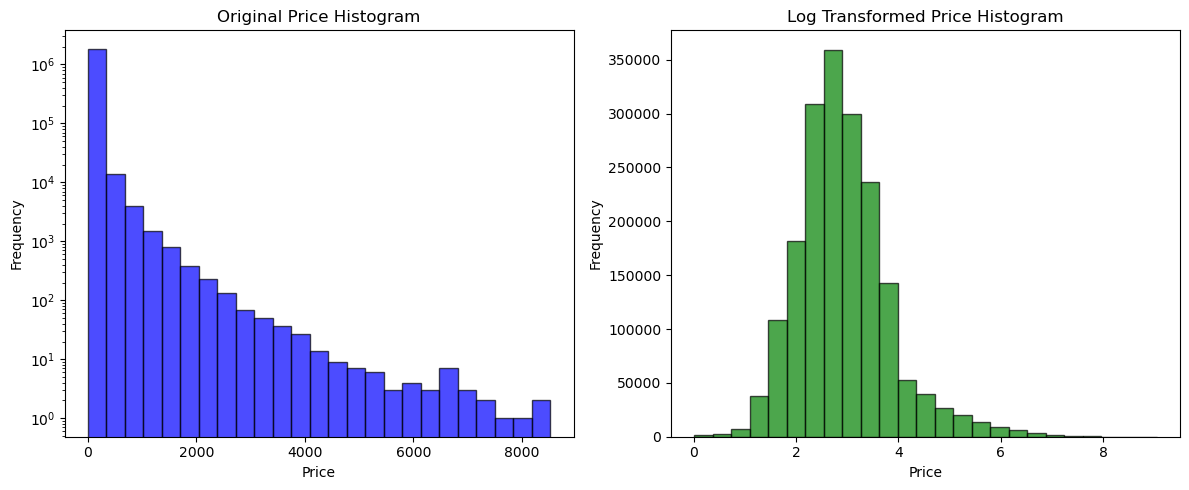

In [7]:
# Plotting histograms
plt.figure(figsize=(12, 5))

# Histogram for original data
plt.subplot(1, 2, 1)
plt.hist(df1['price'], bins=25, color='blue', edgecolor='black', alpha=0.7)
plt.yscale('log')
plt.title('Original Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for log-transformed data
plt.subplot(1, 2, 2)
plt.hist(df1['log_price'], bins=25, color='green', edgecolor='black', alpha=0.7)
plt.title('Log Transformed Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Stars

In [8]:
# indicates if a product has been rated by a customer
df1['is_rated'] = df1['reviews'].apply(lambda x: 1 if x > 0 else 0)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862805 entries, 0 to 2222741
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
 10  log_price          float64
 11  is_rated           int64  
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 172.3+ MB


In [10]:
df1.head()

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,log_price,is_rated
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers,3.135059,1
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers,3.218476,1
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers,3.135059,1
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers,3.496204,1
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers,2.943913,1


In [11]:
df1[df1['stars'] > 0]

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,log_price,is_rated
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers,3.135059,1
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers,3.218476,1
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers,3.135059,1
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers,3.496204,1
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers,2.943913,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2222733,B07DCFQMQL,Speed MaxX BODY ARMOUR CE MOTORBIKE/MOTORCYCLE...,https://m.media-amazon.com/images/I/61XdO74VYI...,https://www.amazon.co.uk/dp/B07DCFQMQL,3.6,66,49.99,False,0,Motorbike Clothing,3.931630,1
2222734,B07JM5VQFX,Motorcycle Clothing Suit - Motorbike Suit With...,https://m.media-amazon.com/images/I/71+02iIgO2...,https://www.amazon.co.uk/dp/B07JM5VQFX,4.1,5,158.99,False,0,Motorbike Clothing,5.075111,1
2222735,B07X98JLFF,GREAT BIKERS GEAR - Bobber Cafe Brat Style Lea...,https://m.media-amazon.com/images/I/91l2r5pSvu...,https://www.amazon.co.uk/dp/B07X98JLFF,3.6,12,14.99,False,0,Motorbike Clothing,2.771964,1
2222740,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,https://m.media-amazon.com/images/I/81KQ5askGG...,https://www.amazon.co.uk/dp/B008OYLL4I,4.3,404,79.99,False,0,Motorbike Clothing,4.394326,1


## Category Name

In [12]:
# unique categories
len(df1['categoryName'].unique())

296

In [13]:
categories = list(df1['categoryName'].unique())

In [14]:
categories.sort()

In [15]:
print(categories)

['3D Printers', '3D Printing & Scanning', 'Abrasive & Finishing Products', 'Action Cameras', 'Adapters', 'Agricultural Equipment & Supplies', 'Alexa Built-In Devices', 'Art & Craft Supplies', 'Arts & Crafts', 'Baby', 'Baby & Toddler Toys', 'Bakeware', 'Ballet & Dancing Footwear', 'Barebone PCs', 'Basketball Footwear', 'Bass Guitars & Gear', 'Bath & Body', 'Bathroom Furniture', 'Bathroom Lighting', 'Bathroom Linen', 'Beauty', 'Bedding & Linen', 'Bedding Accessories', 'Bedding Collections', 'Bedroom Furniture', 'Beer, Wine & Spirits', 'Billiard, Snooker & Pool', 'Binoculars, Telescopes & Optics', 'Bird & Wildlife Care', 'Birthday Gifts', 'Blank Media Cases & Wallets', 'Boating Footwear', 'Bowling', 'Boxes & Organisers', 'Boxing Shoes', 'Boys', 'Building & Construction Toys', 'Building Supplies', 'CD, Disc & Tape Players', 'CPUs', 'Cables & Accessories', 'Calendars & Personal Organisers', 'Camcorders', 'Camera & Photo Accessories', 'Cameras', 'Candles & Holders', 'Car & Motorbike', 'Car &

In [16]:
df1[(df1['categoryName'] == '3D Printers') | (df1['categoryName'] == '3D Printing & Scanning')]

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,log_price,is_rated
328980,B0C9SZ7DCR,"ELEGOO Neptune 4 3D Printer, 500mm/s High-Spee...",https://m.media-amazon.com/images/I/61PK8qUNno...,https://www.amazon.co.uk/dp/B0C9SZ7DCR,4.8,46,299.99,True,100,3D Printers,5.707077,1
328981,B09J8GGDXP,Voxelab Aquila C2 FDM 3D Printer with Removabl...,https://m.media-amazon.com/images/I/61GQvIAcUY...,https://www.amazon.co.uk/dp/B09J8GGDXP,4.2,1262,139.00,False,100,3D Printers,4.941642,1
328982,B09W9B959B,"WEEFUN Upgraded Tina2 3D Printer, Auto Levelin...",https://m.media-amazon.com/images/I/61iI+k91M+...,https://www.amazon.co.uk/dp/B09W9B959B,4.4,187,164.00,False,50,3D Printers,5.105945,1
328983,B0CC5YXN8P,"ELEGOO Mars 4 MSLA Resin 3D Printer, UV Resin ...",https://m.media-amazon.com/images/I/7137RdbCj8...,https://www.amazon.co.uk/dp/B0CC5YXN8P,4.7,1657,279.99,False,0,3D Printers,5.638319,1
328984,B07BR3F9N6,Official Creality Ender 3 3D Printer Fully Ope...,https://m.media-amazon.com/images/I/61L4aoIqYO...,https://www.amazon.co.uk/dp/B07BR3F9N6,4.3,14767,165.00,False,0,3D Printers,5.111988,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2182312,B0C457XDH7,APAAZO Filament Sensor Filament Break Detectio...,https://m.media-amazon.com/images/I/410n49wdnR...,https://www.amazon.co.uk/dp/B0C457XDH7,0.0,0,11.63,False,0,3D Printing & Scanning,2.536075,0
2182313,B0979CQ5PG,PUGONGYING Popular Fit For 10 Pieces Artist D ...,https://m.media-amazon.com/images/I/41X6md9NzP...,https://www.amazon.co.uk/dp/B0979CQ5PG,0.0,0,20.47,False,0,3D Printing & Scanning,3.066657,0
2182314,B097BC1B9N,PUGONGYING Popular 3D Printer Parts Upgrade Fi...,https://m.media-amazon.com/images/I/51Dp5ndYEL...,https://www.amazon.co.uk/dp/B097BC1B9N,0.0,0,18.62,False,0,3D Printing & Scanning,2.976549,0
2182315,B0C3XC6DYK,APAAZO 17 Damper Radiator Aluminum Motor Heats...,https://m.media-amazon.com/images/I/51+IhZcLKY...,https://www.amazon.co.uk/dp/B0C3XC6DYK,0.0,0,4.02,False,0,3D Printing & Scanning,1.613430,0


In [17]:
# top 10 products
df1['categoryName'].value_counts()[:39].sum()

1079773

In [18]:
# total number of products
df1.count()

asin                 1862805
title                1862805
imgUrl               1862805
productURL           1862805
stars                1862805
reviews              1862805
price                1862805
isBestSeller         1862805
boughtInLastMonth    1862805
categoryName         1862805
log_price            1862805
is_rated             1862805
dtype: int64

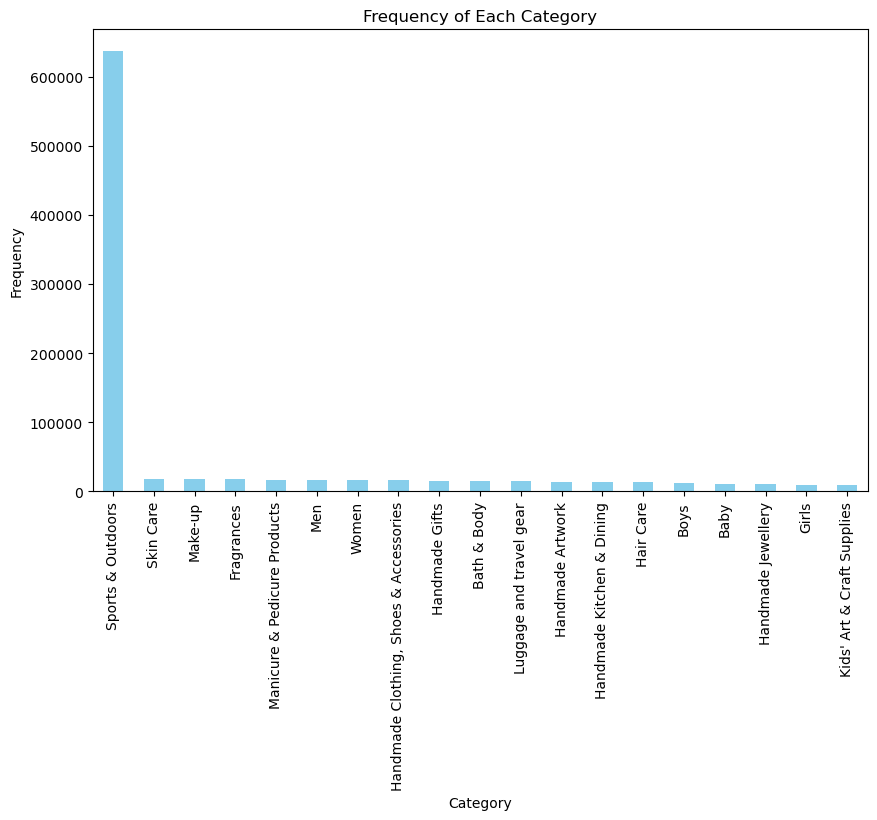

In [19]:
plt.figure(figsize=(10, 6))
df1['categoryName'].value_counts()[:19].plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks()
plt.show()

In [20]:
# Calculate the proportions
proportions = df1['categoryName'].value_counts(normalize=True) * 100

# Print the proportions
print(proportions)

Sports & Outdoors                      34.172230
Skin Care                               1.005580
Make-up                                 0.989851
Fragrances                              0.971546
Manicure & Pedicure Products            0.922533
                                         ...    
Lighting                                0.002684
Smart Home Security & Lighting          0.002469
Motorbike Exhaust & Exhaust Systems     0.001933
Smart Speakers                          0.001074
Cameras                                 0.000644
Name: categoryName, Length: 296, dtype: float64


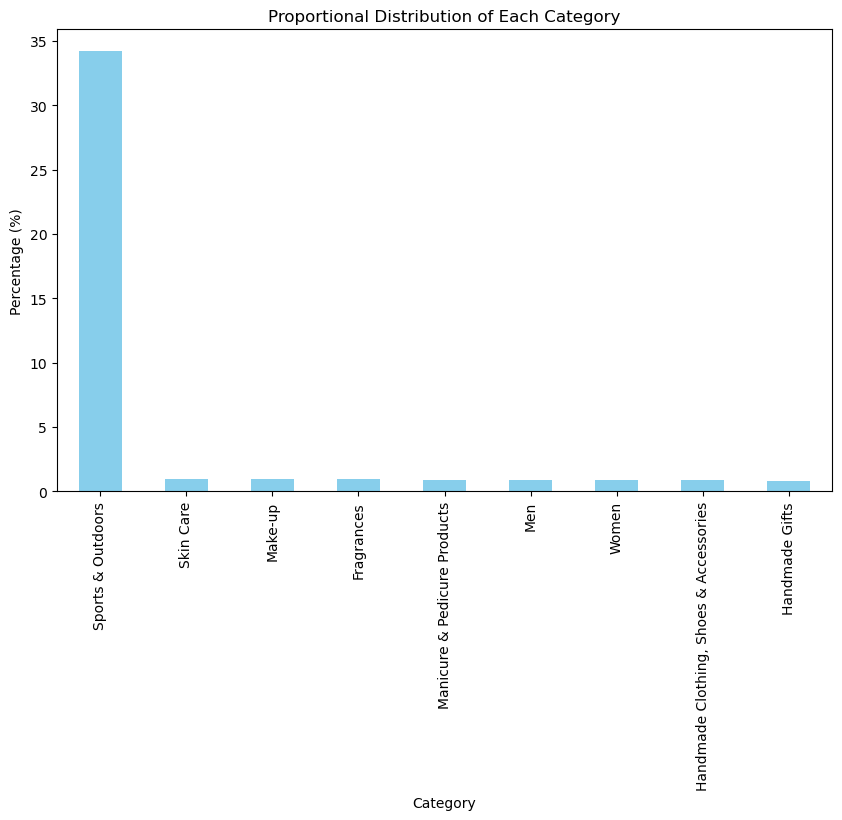

In [21]:
# Plotting the proportions
plt.figure(figsize=(10, 6))
proportions[:9].plot(kind='bar', color='skyblue')
plt.title('Proportional Distribution of Each Category')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.xticks()
plt.show()

In [22]:
print(categories)

['3D Printers', '3D Printing & Scanning', 'Abrasive & Finishing Products', 'Action Cameras', 'Adapters', 'Agricultural Equipment & Supplies', 'Alexa Built-In Devices', 'Art & Craft Supplies', 'Arts & Crafts', 'Baby', 'Baby & Toddler Toys', 'Bakeware', 'Ballet & Dancing Footwear', 'Barebone PCs', 'Basketball Footwear', 'Bass Guitars & Gear', 'Bath & Body', 'Bathroom Furniture', 'Bathroom Lighting', 'Bathroom Linen', 'Beauty', 'Bedding & Linen', 'Bedding Accessories', 'Bedding Collections', 'Bedroom Furniture', 'Beer, Wine & Spirits', 'Billiard, Snooker & Pool', 'Binoculars, Telescopes & Optics', 'Bird & Wildlife Care', 'Birthday Gifts', 'Blank Media Cases & Wallets', 'Boating Footwear', 'Bowling', 'Boxes & Organisers', 'Boxing Shoes', 'Boys', 'Building & Construction Toys', 'Building Supplies', 'CD, Disc & Tape Players', 'CPUs', 'Cables & Accessories', 'Calendars & Personal Organisers', 'Camcorders', 'Camera & Photo Accessories', 'Cameras', 'Candles & Holders', 'Car & Motorbike', 'Car &

In [23]:
df2 = df1.copy()

In [24]:
def change_name(old_names, new_name):
    df2['categoryName'] = (df2['categoryName'].apply(lambda x: new_name if x in old_names else x))

In [25]:
dict_names = {
    'Electronics & Computers': ['3D Printers', '3D Printing & Scanning', 'Action Cameras', 'Adapters', 'Barebone PCs',
                               'Cameras', 'Computer & Server Racks', 'Computer Audio & Video Accessories', 'Computer Cases', 
                                'Computer Memory', 'Computer Memory Card Accessories', 'Computer Printers', 'Computer Screws', 
                                'Computers, Components & Accessories', 'Desktop PCs', 'Laptop Accessories', 'Laptops', 
                               'Mobile Phone Accessories', 'Mobile Phones & Communication', 'Mobile Phones & Smartphones',
                               'Monitors', 'Motherboards', 'Network Cards', 'Networking Devices', 'Alexa Built-In Devices',
                               'Barebone PCs', 'Camera & Photo Accessories', 'Camcorders', 'Data Storage', 'Digital Cameras',
                               'Digital Frames', 'External Optical Drives', 'External Sound Cards',
                                'External TV Tuners & Video Capture Cards', 'Film Cameras', 'Graphics Cards', 
                                'Hard Drive Accessories','Headphones & Earphones', 'Headphones, Earphones & Accessories',
                               'I/O Port Cards', 'Internal Optical Drives','Internal TV Tuner & Video Capture Cards',
                               'Keyboards, Mice & Input Devices', 'Media Streaming Devices', 'Monitor Accessories',
                               'Printer Accessories', 'Printers & Accessories', 'Projectors', 'Radio Communication',
                                'Radios & Boomboxes', 'Recording & Computer','Remote & App-Controlled Devices',
                               'Portable Sound & Video Products','Power Supplies', 'Tablet Accessories', 'Tablets',
                               'Photo Printers', 'Smart Speakers', 'Smartwatches', 'Streaming Clients',
                               'eBook Readers & Accessories', 'Blank Media Cases & Wallets', 'CD, Disc & Tape Players',
                                'CPUs', 'Cables & Accessories', 'Flashes', 'KVM Switches', 'Lenses', 'Plugs',
                               'Scanners & Accessories', 'Test & Measurement', 'Thermometers & Meteorological Instruments',
                                'Tripods & Monopods', 'USB Gadgets', 'USB Hubs',
                                'Uninterruptible Power Supply Units & Accessories', 'Wearable Technology',
                               'Telephones, VoIP & Accessories', 'Electrical Power Accessories', 'SIM Cards'],
    'Home & Kitchen' : ['Bakeware', 'Bedding & Linen', 'Bedding Accessories', 'Bedding Collections', 'Bedroom Furniture',
                       'Coffee & Espresso Machines', 'Cookware', 'Dining Room Furniture', 'Kitchen Tools & Gadgets',
                       'Small Kitchen Appliances','Bathroom Furniture', 'Bathroom Lighting', 'Bathroom Linen', 'Clocks',
                       'Curtain & Blind Accessories', 'Boxes & Organisers', 'Cushions & Accessories', 
                        'Decorative Artificial Flora', 'Decorative Home Accessories', 'Doormats', 
                        'Fireplaces, Stoves & Accessories', 'Furniture & Lighting', 'Hallway Furniture',
                        'Heating, Cooling & Air Quality',  'Home Audio Record Players', 'Home Bar Furniture',
                        'Home Brewing & Wine Making', 'Home Entertainment','Home Entertainment Furniture',
                       'Household Batteries, Chargers & Accessories', 'Home Fragrance', 'Ironing & Steamers',
                       'Living Room Furniture', 'Kitchen & Bath Fixtures', 'Kitchen Linen','Kitchen Storage & Organisation',
                       'Home Office Furniture', 'Mattress Pads & Toppers', 'Vacuums & Floorcare', 
                        'Inflatable Beds, Pillows & Accessories', 'Mirrors', 'Rugs, Pads & Protectors', 'Slipcovers',
                       'Storage & Home Organisation', 'Storage & Organisation', 'Vases','Water Coolers, Filters & Cartridges',
                       'Window Treatments', 'Tableware', 'Large Appliances'],
    'Fashion & Apparel': ['Ballet & Dancing Footwear', 'Basketball Footwear', 'Boys', 'Girls', 'Men', 'Women'],
    'Beauty & Personal Care': ['Bath & Body', 'Beauty', 'Fragrances', 'Hair Care', 'Make-up', 'Skin Care', 
                               'Manicure & Pedicure Products'],
    'Sports & Outdoor Equipment': ['Agricultural Equipment & Supplies', 'Cycling Shoes', 'Golf Shoes', 'Sports & Outdoors', 
                                   'Sports Supplements', 'Sports Toys & Outdoor', 'Binoculars, Telescopes & Optics',
                                   'Bird & Wildlife Care', 'Boating Footwear', 'Bowling', 'Boxing Shoes', 'Climbing Footwear',
                                  'Cricket Shoes', 'Downhill Ski Boots', 'Downhill Skis', 'Equestrian Sports Boots',
                                  'GPS, Finders & Accessories', 'Hiking Hand & Foot Warmers', 'Hockey Shoes',
                                  'Ski Clothing', 'Ski Goggles', 'Ski Helmets', 'Skiing Poles', 'Snow Sledding Equipment',
                                   'Snowboard Bindings', 'Snowboard Boots', 'Snowboards', "Women's Sports & Outdoor Shoes",
                                  "Men's Sports & Outdoor Shoes", 'Tennis Shoes'],
    'Hobbies, Toys & Games': ['Arts & Crafts', 'Art & Craft Supplies', 'Building & Construction Toys', 'Electronic Toys', 
                              'Games & Game Accessories', 'Hobbies', 'Jigsaws & Puzzles', 'Soft Toys', 'Toy Advent Calendars',
                             'Billiard, Snooker & Pool', 'Darts & Dartboards','Dolls & Accessories', 
                              "Kids' Art & Craft Supplies","Kids' Dress Up & Pretend Play", "Kids' Play Figures",
                              "Kids' Play Vehicles", 'Learning & Education Toys', 'PC & Video Games','PC Gaming Accessories',
                             'Table Tennis', 'Trampolines & Accessories'],
    'Music & Entertainment': ['Bass Guitars & Gear', 'DJ & VJ Equipment', 'Drums & Percussion', 'Guitars & Gear',
                             'Home Cinema, TV & Video', 'Piano & Keyboard', 'Wind Instruments','Hi-Fi & Home Audio Accessories',
                              'Hi-Fi Receivers & Separates','Hi-Fi Speakers', 'General Music-Making Accessories',
                             'Karaoke Equipment', 'String Instruments', 'Synthesisers, Samplers & Digital Instruments',
                             'Microphones', 'PA & Stage'],
    'Office & Business Supplies': ['Calendars & Personal Organisers', 'Office Electronics', 'Office Paper Products',
                                  'Office Supplies', 'Professional Education Supplies'],
    'Automotive & Industrial': ['Car & Motorbike', 'Car & Vehicle Electronics', 'Construction Machinery', 
                                'Industrial Electrical', 'Material Handling Products', 'Hydraulics, Pneumatics & Plumbing',
                               'Motorbike Batteries', 'Motorbike Boots & Luggage', 'Motorbike Brakes','Motorbike Chassis',
                                'Motorbike Clothing', 'Motorbike Drive & Gears','Motorbike Electrical & Batteries',
                                'Motorbike Engines & Engine Parts','Motorbike Exhaust & Exhaust Systems',
                                'Motorbike Handlebars, Controls & Grips', 'Motorbike Instruments','Motorbike Lighting',
                                'Motorbike Seat Covers', 'Motorbike Accessories', 'Rough Plumbing'],
    'Home Improvement & DIY': ['Abrasive & Finishing Products','Building Supplies', 'Electrical', 'Hardware', 
                               'Painting Supplies, Tools & Wall Treatments', 'Power & Hand Tools', 'Cutting Tools',
                              'Decking & Fencing', 'Indoor Lighting', 'Light Bulbs','Lighting', 'Lights and switches'],
    'Gardening & Outdoor Living': ['Garden Décor', 'Garden Furniture & Accessories', 'Garden Storage & Housing',
                                   'Garden Tools & Watering Equipment', 'Gardening', 'Mowers & Outdoor Power Tools',
                                  'Outdoor Cooking','Outdoor Heaters & Fire Pits', 'Outdoor Lighting', 'Outdoor Rope Lights',
                                  'Plants, Seeds & Bulbs', 'Torches', 'String Lights', 'Smart Home Security & Lighting',
                                  'Surveillance Cameras'],
    'Handmade Crafts': ['Handmade', 'Handmade Artwork', 'Handmade Baby Products','Handmade Clothing, Shoes & Accessories',
                        'Handmade Gifts','Handmade Home & Kitchen Products', 'Handmade Home Décor','Handmade Jewellery',
                        'Handmade Kitchen & Dining', 'Made in Italy Handmade'],
    'Babies & Children': ['Baby', 'Baby & Toddler Toys', "Children's Bedding"],
    'Food & Groceries': ['Grocery', 'Beer, Wine & Spirits', 'Coffee, Tea & Espresso', 'Luxury Food & Drink']
}

# fix grocery name

In [26]:
for key, values in dict_names.items():
    change_name(values, key)

In [27]:
cat_2 = df2['categoryName'].unique()
cat_2.sort()
print(cat_2)
print(len(cat_2))

['Automotive & Industrial' 'Babies & Children' 'Beauty & Personal Care'
 'Birthday Gifts' 'Candles & Holders' "Customers' Most Loved"
 'Electronics & Computers' 'Fashion & Apparel' 'Food & Groceries'
 'Gardening & Outdoor Living' 'Gifts for Her' 'Gifts for Him'
 'Handmade Crafts' 'Health & Personal Care' 'Hobbies, Toys & Games'
 'Home & Kitchen' 'Home Improvement & DIY' 'Lab & Scientific Products'
 'Luggage and travel gear' 'Music & Entertainment'
 'Office & Business Supplies' 'Packaging & Shipping Supplies'
 'Pens, Pencils & Writing Supplies' 'Pet Supplies' 'Photo Frames'
 'Pools, Hot Tubs & Supplies' 'Professional Medical Supplies'
 'Safety & Security' 'School & Educational Supplies' 'Signs & Plaques'
 'Sports & Outdoor Equipment']
31


In [28]:
df2[df2['categoryName'] =='SIM Cards']

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,log_price,is_rated


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862805 entries, 0 to 2222741
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
 10  log_price          float64
 11  is_rated           int64  
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 172.3+ MB


In [30]:
df2['categoryName'].value_counts()

Sports & Outdoor Equipment          708785
Electronics & Computers             229138
Hobbies, Toys & Games               138250
Home & Kitchen                      124805
Beauty & Personal Care              106725
Handmade Crafts                      97969
Gardening & Outdoor Living           81341
Fashion & Apparel                    62086
Music & Entertainment                59954
Home Improvement & DIY               52273
Automotive & Industrial              50765
Office & Business Supplies           24421
Food & Groceries                     22622
Babies & Children                    20093
Luggage and travel gear              14497
Pet Supplies                          9430
Pens, Pencils & Writing Supplies      9097
Pools, Hot Tubs & Supplies            8288
Health & Personal Care                8234
School & Educational Supplies         7609
Customers' Most Loved                 6822
Birthday Gifts                        6669
Safety & Security                     6452
Signs & Pla

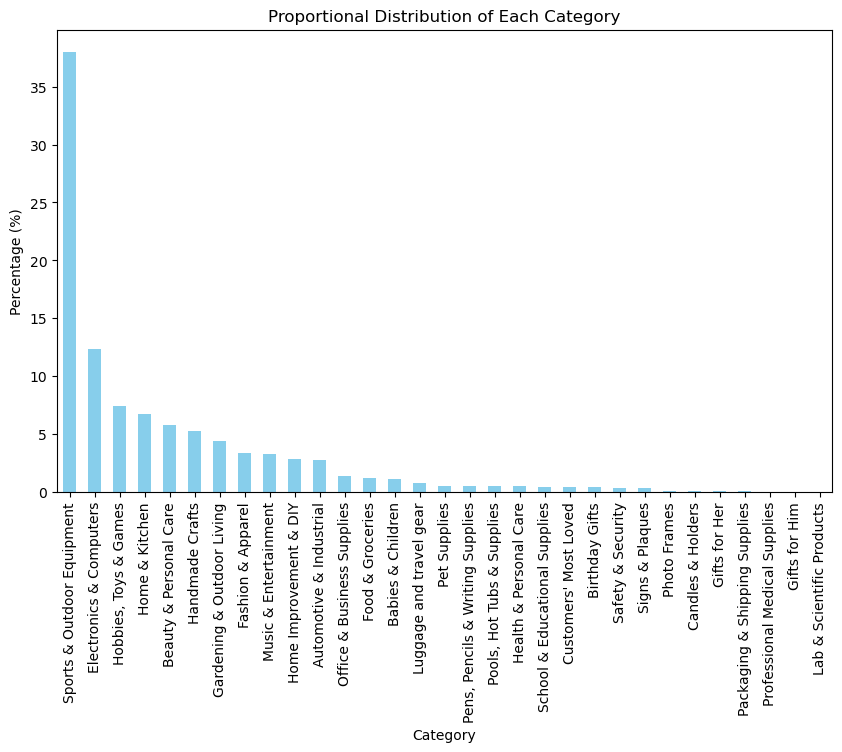

In [31]:
new_proportions = df2['categoryName'].value_counts(normalize=True) * 100

# Plotting the proportions
plt.figure(figsize=(10, 6))
new_proportions.plot(kind='bar', color='skyblue')
plt.title('Proportional Distribution of Each Category')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.xticks()
plt.show()

In [32]:
new_proportions

Sports & Outdoor Equipment          38.049340
Electronics & Computers             12.300697
Hobbies, Toys & Games                7.421603
Home & Kitchen                       6.699842
Beauty & Personal Care               5.729263
Handmade Crafts                      5.259219
Gardening & Outdoor Living           4.366587
Fashion & Apparel                    3.332931
Music & Entertainment                3.218480
Home Improvement & DIY               2.806144
Automotive & Industrial              2.725191
Office & Business Supplies           1.310980
Food & Groceries                     1.214405
Babies & Children                    1.078642
Luggage and travel gear              0.778235
Pet Supplies                         0.506226
Pens, Pencils & Writing Supplies     0.488350
Pools, Hot Tubs & Supplies           0.444920
Health & Personal Care               0.442022
School & Educational Supplies        0.408470
Customers' Most Loved                0.366222
Birthday Gifts                    

In [33]:
df3 = df2.copy()

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862805 entries, 0 to 2222741
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
 10  log_price          float64
 11  is_rated           int64  
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 172.3+ MB


In [35]:
df3.head()

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,log_price,is_rated
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Music & Entertainment,3.135059,1
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Music & Entertainment,3.218476,1
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Music & Entertainment,3.135059,1
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Music & Entertainment,3.496204,1
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Music & Entertainment,2.943913,1


In [36]:
# dropping irrelevant columns
df3 = df3[['title', 'imgUrl', 'productURL', 'reviews', 'is_rated', 'log_price', 'categoryName', 'stars']]

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862805 entries, 0 to 2222741
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   title         object 
 1   imgUrl        object 
 2   productURL    object 
 3   reviews       int64  
 4   is_rated      int64  
 5   log_price     float64
 6   categoryName  object 
 7   stars         float64
dtypes: float64(2), int64(2), object(4)
memory usage: 127.9+ MB


In [38]:
# using one-hot encoding as there is no natural order to the categoryName

df4 = pd.get_dummies(df3, columns=['categoryName'])
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862805 entries, 0 to 2222741
Data columns (total 38 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   title                                          object 
 1   imgUrl                                         object 
 2   productURL                                     object 
 3   reviews                                        int64  
 4   is_rated                                       int64  
 5   log_price                                      float64
 6   stars                                          float64
 7   categoryName_Automotive & Industrial           uint8  
 8   categoryName_Babies & Children                 uint8  
 9   categoryName_Beauty & Personal Care            uint8  
 10  categoryName_Birthday Gifts                    uint8  
 11  categoryName_Candles & Holders                 uint8  
 12  categoryName_Customers' Most Loved        

In [ ]:
# saving processed data
df4.to_csv('../processed/data_processed.csv', index=False)